# FashionMNIST dataset using Pytorch

**Importing Libraries**



- `import pandas as pd`: Imports the pandas library and aliases it as `pd`, commonly used for data manipulation and analysis.
- `import numpy as np`: Imports the NumPy library and aliases it as `np`, which provides support for numerical computations and array operations.
- `import matplotlib.pyplot as plt`: Imports the matplotlib library, specifically the pyplot module, and aliases it as `plt`. This allows for data visualization, such as plotting graphs and charts.
- `import torch`: Imports the PyTorch library, an open-source machine learning framework.
- `import torch.nn as nn`: Imports the neural network module (`nn`) from PyTorch, which provides tools for building neural networks.
- `from torch.autograd import Variable`: Imports the `Variable` class from `torch.autograd`, which is used to wrap tensor inputs to enable automatic differentiation for gradient computation in PyTorch.
- `import torchvision`: Imports the `torchvision` library, which provides access to datasets, models, and transformations for computer vision tasks in PyTorch.
- `import torchvision.transforms as transforms`: Imports the `transforms` module from `torchvision`, which contains common image transformations.
- `from torch.utils.data import Dataset, DataLoader`: Imports the `Dataset` and `DataLoader` classes from `torch.utils.data`, used for managing datasets and creating data loaders for efficient data handling during training.
- `from sklearn.metrics import confusion_matrix`: Imports the `confusion_matrix` function from the `sklearn.metrics` module, which is commonly used for evaluating the performance of classification models by comparing predicted and true labels.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

If the GPU is available use it for the computation otherwise use the CPU.

In [42]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [43]:
train_data = pd.read_csv("/content/fashion-mnist_train.csv")
test_data = pd.read_csv("/content/fashion-mnist_test.csv")

In [44]:
len(train_data)

60000

In [45]:
class FashionDataset(Dataset):
    """User defined class to build a dataset using Pytorch class Dataset."""

    def __init__(self, data, transform = None):
        """Method to initilaize variables."""
        self.fashion_MNIST = list(data.values)
        self.transform = transform

        label = []
        image = []

        for i in self.fashion_MNIST:
             # first column is of labels.
            label.append(i[0])
            image.append(i[1:])
        self.labels = np.asarray(label)
        # Dimension of Images = 28 * 28 * 1. where height = width = 28 and color_channels = 1.
        self.images = np.asarray(image).reshape(-1, 28, 28, 1).astype('float32')

    def __getitem__(self, index):
        label = self.labels[index]
        image = self.images[index]

        if self.transform is not None:
            image = self.transform(image)

        return image, label

    def __len__(self):
        return len(self.images)

Tensors don't always have a range from 0 to 1. The range of values in a tensor depends on how it was created or manipulated. In many cases, tensors are normalized to have values within a certain range, such as 0 to 1 or -1 to 1, for numerical stability and better performance during training in deep learning models. However, this normalization is not mandatory and depends on the specific requirements of the model and the data being used.

Normalization to the range of 0 to 1 is often applied to input data, especially in image processing tasks, where pixel values are typically in the range of 0 to 255 for images with 8-bit color depth. Dividing the pixel values by 255 scales them to the range of 0 to 1.

**In PyTorch, you can normalize a tensor to the range of 0 to 1 using the `torchvision.transforms.ToTensor()` transformation** when loading data. Additionally, you can apply custom normalization by dividing the tensor by its maximum value or using other scaling techniques depending on the context of your application.

In [46]:
# Transform data into Tensor that has a range from 0 to 1
train_set = FashionDataset(train_data, transform=transforms.Compose([transforms.ToTensor()]))
test_set = FashionDataset(test_data, transform=transforms.Compose([transforms.ToTensor()]))

train_loader = DataLoader(train_set, batch_size=100)
test_loader = DataLoader(train_set, batch_size=100)

In [47]:
len(train_loader)

600

1. We have 10 types of clothes in FashionMNIST dataset.
2. Making a method that return the name of class for the label number. ex. if the label is 5, we return Sandal.

In [48]:
def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat",
                 5: "Sandal",
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

Playing with data and displaying some images using matplotlib imshow() method.

The code `a = next(iter(train_loader))` is typically used in PyTorch to extract the next batch of data from a `DataLoader` object during iteration. Here's a breakdown of what each part of the code does:

- `train_loader`: This is a `DataLoader` object that contains your training dataset. It is typically created using the `DataLoader` class provided by PyTorch and is responsible for managing the data loading process, such as shuffling the data, creating batches, and loading the data in parallel processes.

- `iter(train_loader)`: This creates an iterator from the `train_loader` object, allowing you to iterate over the batches of data contained within the loader.

- `next(...)`: This function is used to retrieve the next element from the iterator. In this case, it retrieves the next batch of data from the `train_loader`.

- `a = ...`: This assigns the retrieved batch of data to the variable `a`.

So, after executing this code, `a` will contain the next batch of data from your training dataset, which you can then use for training your neural network model. Each element of `a` typically consists of input data (e.g., images) and their corresponding labels, organized as tensors or arrays, depending on how you've processed your data.

In [49]:
a = next(iter(train_loader))
a[0].size()

torch.Size([100, 1, 28, 28])

len(a)  # Print the length of the batch
(a[0].shape) # Print the shape of the input data in the batch
(a[1])  # Print the labels or target values in the batch

In [50]:
len(train_set)

60000

2


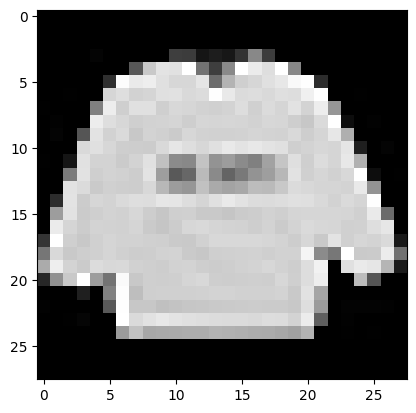

In [51]:
image, label = next(iter(train_set))
plt.imshow(image.squeeze(), cmap="gray")
print(label)

In [52]:
demo_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

batch = next(iter(demo_loader))
images, labels = batch
print(type(images), type(labels))
print(images.shape, labels.shape)

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([10, 1, 28, 28]) torch.Size([10])


labels:  Pullover, Ankle Boot, Shirt, T-shirt/Top, Dress, Coat, Coat, Sandal, Coat, Bag, 

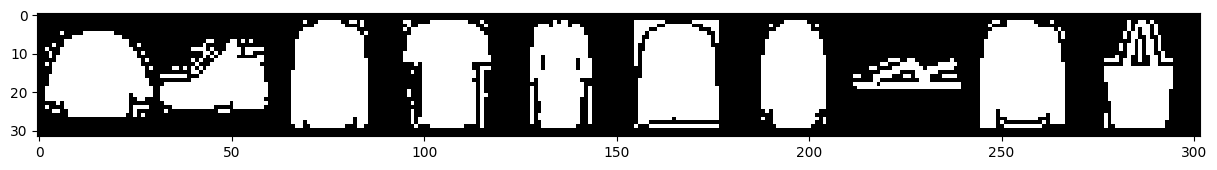

In [53]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print("labels: ", end=" ")
for i, label in enumerate(labels):
    print(output_label(label), end=", ")


# **CNN**

*   Make a model class (FashionCNN in our case)
    * It inherit nn.Module class that is a super class for all the neural networks in Pytorch.
* Our Neural Net has following layers:
    * Two Sequential layers each consists of following layers-
        * Convolution layer that has kernel size of 3 * 3, padding = 1 (zero_padding) in 1st layer and padding = 0 in second one. Stride of 1 in both layer.
        * Batch Normalization layer.
        * Acitvation function: ReLU.
        * Max Pooling layer with kernel size of 2 * 2 and stride 2.
     * Flatten out the output for dense layer(a.k.a. fully connected layer).
     * 3 Fully connected layer  with different in/out features.
     * 1 Dropout layer that has class probability p = 0.25.
  
     * All the functionaltiy is given in forward method that defines the forward pass of CNN.
     * Our input image is changing in a following way:
        * First Convulation layer : input: 28 \* 28 \* 3, output: 28 \* 28 \* 32
        * First Max Pooling layer : input: 28 \* 28 \* 32, output: 14 \* 14 \* 32
        * Second Conv layer : input : 14 \* 14 \* 32, output: 12 \* 12 \* 64
        * Second Max Pooling layer : 12 \* 12 \* 64, output:  6 \* 6 \* 64
    * Final fully connected layer has 10 output features for 10 types of clothes.

> Lets implementing the network...





In [54]:
class FashionCNN(nn.Module):

    def __init__(self):
        super(FashionCNN, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)

        return out


### Making a model of our CNN class

*   Creating a object(model in the code)
*   Transfering it into GPU if available.
*  Defining a Loss function. we're using CrossEntropyLoss() here.
*  Using Adam algorithm for optimization purpose.



In [55]:
model = FashionCNN()
model.to(device)

error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


## Training a network and Testing it on test dataset

In [56]:
num_epochs = 5
count = 0
# Lists for visualization of loss and accuracy
loss_list = []
iteration_list = []
accuracy_list = []

# Lists for knowing classwise accuracy
predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Transfering images and labels to GPU if available
        images, labels = images.to(device), labels.to(device)

        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)

        # Forward pass
        outputs = model(train)
        loss = error(outputs, labels.long())

        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()

        #Propagating the error backward
        loss.backward()

        # Optimizing the parameters
        optimizer.step()

        count += 1

    # Testing the model

        if not (count % 50):    # It's same as "if count % 50 == 0"
            total = 0
            correct = 0

            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)

                test = Variable(images.view(100, 1, 28, 28))

                outputs = model(test)

                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()

                total += len(labels)

            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1347: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Iteration: 500, Loss: 0.5195703506469727, Accuracy: 87.58999633789062%
Iteration: 1000, Loss: 0.25709474086761475, Accuracy: 90.2933349609375%
Iteration: 1500, Loss: 0.253013551235199, Accuracy: 90.49500274658203%
Iteration: 2000, Loss: 0.24763289093971252, Accuracy: 91.90499877929688%
Iteration: 2500, Loss: 0.20219749212265015, Accuracy: 92.50499725341797%
Iteration: 3000, Loss: 0.2037147581577301, Accuracy: 93.47666931152344%


### Visualizing the Loss and Accuracy with Iterations

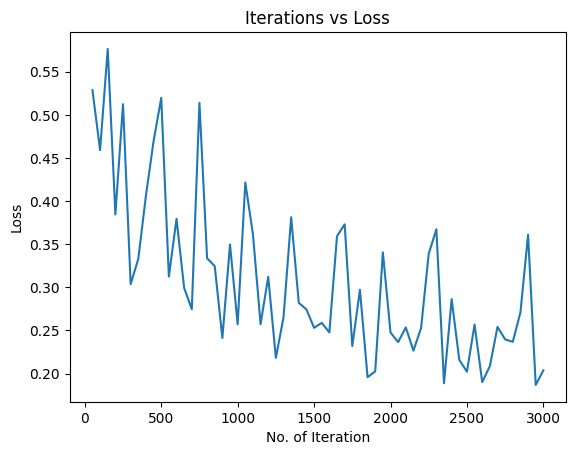

In [57]:
plt.plot(iteration_list, loss_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

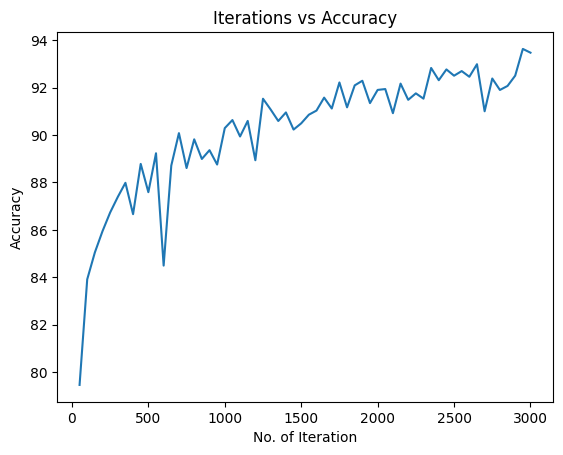

In [58]:
plt.plot(iteration_list, accuracy_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy")
plt.show()

### Looking the Accuracy in each class of FashionMNIST dataset

In [59]:
class_correct = [0. for _ in range(10)]
total_correct = [0. for _ in range(10)]

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        test = Variable(images)
        outputs = model(test)
        predicted = torch.max(outputs, 1)[1]
        c = (predicted == labels).squeeze()

        for i in range(100):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1

for i in range(10):
    print("Accuracy of {}: {:.2f}%".format(output_label(i), class_correct[i] * 100 / total_correct[i]))

Accuracy of T-shirt/Top: 83.62%
Accuracy of Trouser: 99.17%
Accuracy of Pullover: 87.72%
Accuracy of Dress: 95.47%
Accuracy of Coat: 91.95%
Accuracy of Sandal: 98.87%
Accuracy of Shirt: 83.55%
Accuracy of Sneaker: 96.12%
Accuracy of Bag: 99.58%
Accuracy of Ankle Boot: 98.92%


### Printing the Confusion Matrix

In [60]:
from itertools import chain

predictions_l = [predictions_list[i].tolist() for i in range(len(predictions_list))]
labels_l = [labels_list[i].tolist() for i in range(len(labels_list))]
predictions_l = list(chain.from_iterable(predictions_l))
labels_l = list(chain.from_iterable(labels_l))

In [61]:
import sklearn.metrics as metrics

confusion_matrix(labels_l, predictions_l)
print("Classification report for CNN :\n%s\n"
      % (metrics.classification_report(labels_l, predictions_l)))

Classification report for CNN :
              precision    recall  f1-score   support

           0       0.85      0.84      0.85    360000
           1       0.99      0.98      0.98    360000
           2       0.85      0.86      0.85    360000
           3       0.89      0.91      0.90    360000
           4       0.84      0.83      0.84    360000
           5       0.97      0.97      0.97    360000
           6       0.74      0.73      0.73    360000
           7       0.95      0.95      0.95    360000
           8       0.98      0.98      0.98    360000
           9       0.96      0.96      0.96    360000

    accuracy                           0.90   3600000
   macro avg       0.90      0.90      0.90   3600000
weighted avg       0.90      0.90      0.90   3600000




93% test accuracy